# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We hav the data for years 2016-2020 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2020.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [1]:
library('tidyverse')
library('readxl')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [4]:
df_price_index = read_excel("revised-seasonally-adjusted-indexes-2020.xlsx")

df_price_index |> as_tibble() |> print()

# A tibble: 6,450 × 17
   ITEM  TITLE     seriesid  DATA_TYPE YEAR    JAN   FEB   MAR   APR   MAY   JUN
   <chr> <chr>     <chr>     <chr>     <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 SA0   All items CUSR0000… SEASONAL… 2016  238.  237.   238.  239.  240.  240.
 2 SA0   All items CUSR0000… SEASONAL… 2017  244.  244.   244.  244.  244.  244.
 3 SA0   All items CUSR0000… SEASONAL… 2018  249.  249.   250.  250.  251.  251.
 4 SA0   All items CUSR0000… SEASONAL… 2019  252.  253.   254.  255.  255.  255.
 5 SA0   All items CUSR0000… SEASONAL… 2020  259.  259.   258.  256.  256.  257.
 6 SA0   All items CUSR0000… SEASONAL… 2016   99.7  99.9  100.  100.  100.  100.
 7 SA0   All items CUSR0000… SEASONAL… 2017   99.7  99.9  100.  100.  100.  100.
 8 SA0   All items CUSR0000… SEASONAL… 2018   99.7  99.9  100.  100.  100.  100.
 9 SA0   All items CUSR0000… SEASONAL… 2019   99.7  99.9  100.  100.  100.  100.
10 SA0   All items CUSR0000… SEASONAL… 2020   99.7  99.9  100.  100.  100.  100.
# ℹ 6

We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for the year 2020.

You'll need this months vector for several operations:

In [5]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `Year == 2020`, 
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Group by month and `TITLE` then summarize by finding the mean index for each group.
- And last, use `forcats` to set the levels for the month column (hint: `tct_relevel(name, months)`)

The first three rows of your table will look something like this:

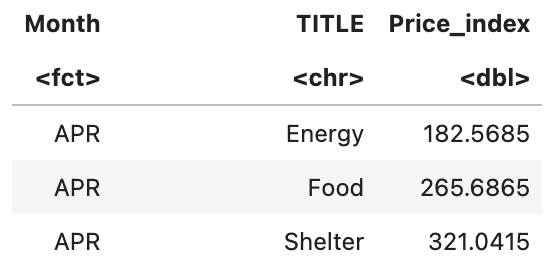

In [22]:
# Filtering for Year == 2020, TITLE, and DATA_TYPE
df_filtered = df_price_index|>
  filter(YEAR == 2020, 
         TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks'), 
         DATA_TYPE == 'SEASONALLY ADJUSTED INDEX')


In [23]:
df_long= df_filtered |>
  pivot_longer(cols = `JAN`:`DEC`, names_to = "Month", values_to = "SEASONALLY_ADJUSTED_INDEX")

In [24]:
df_summarized = df_long |>
  group_by(Month, TITLE) |>
  summarise(mean_index = mean(SEASONALLY_ADJUSTED_INDEX, na.rm = TRUE))

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


In [25]:
df_final= df_summarized |>
  mutate(Month = forcats::fct_relevel(Month, months))

Warning message:
“There were 12 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Month = forcats::fct_relevel(Month, months)`.
ℹ In group 1: `Month = "APR"`.
Caused by warning:
! 11 unknown levels in `f`: JAN, FEB, MAR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, and
DEC
ℹ Run `dplyr::last_dplyr_warnings()` to see the 11 remaining warnings.”


In [27]:
df_final|>head()

Month,TITLE,mean_index
<fct>,<chr>,<dbl>
APR,Energy,182.5685
APR,Food,265.6865
APR,Shelter,321.0415
APR,Used cars and trucks,137.9830
AUG,Energy,192.5610
AUG,Food,268.4065


Ok! Now make this plot:

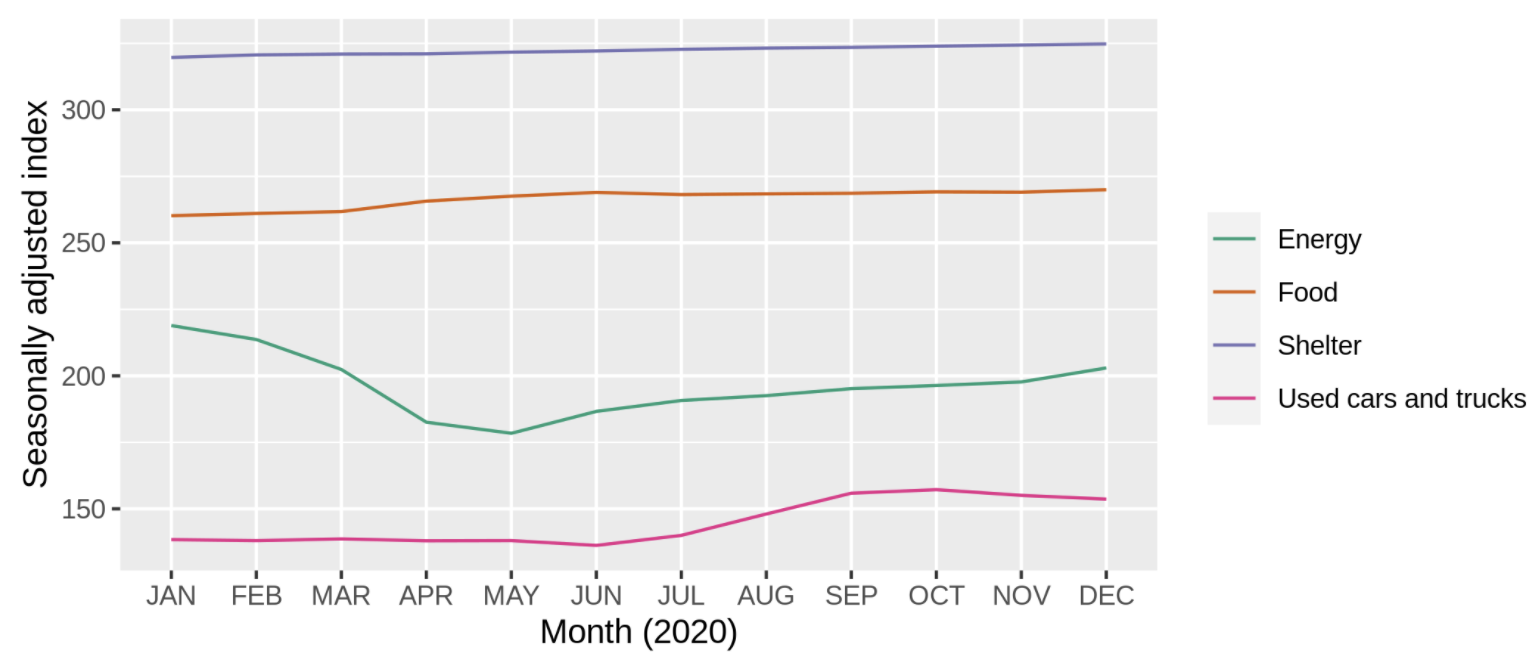

In [56]:
options(repr.plot.res=300, repr.plot.width=8,repr.plot.height=3)

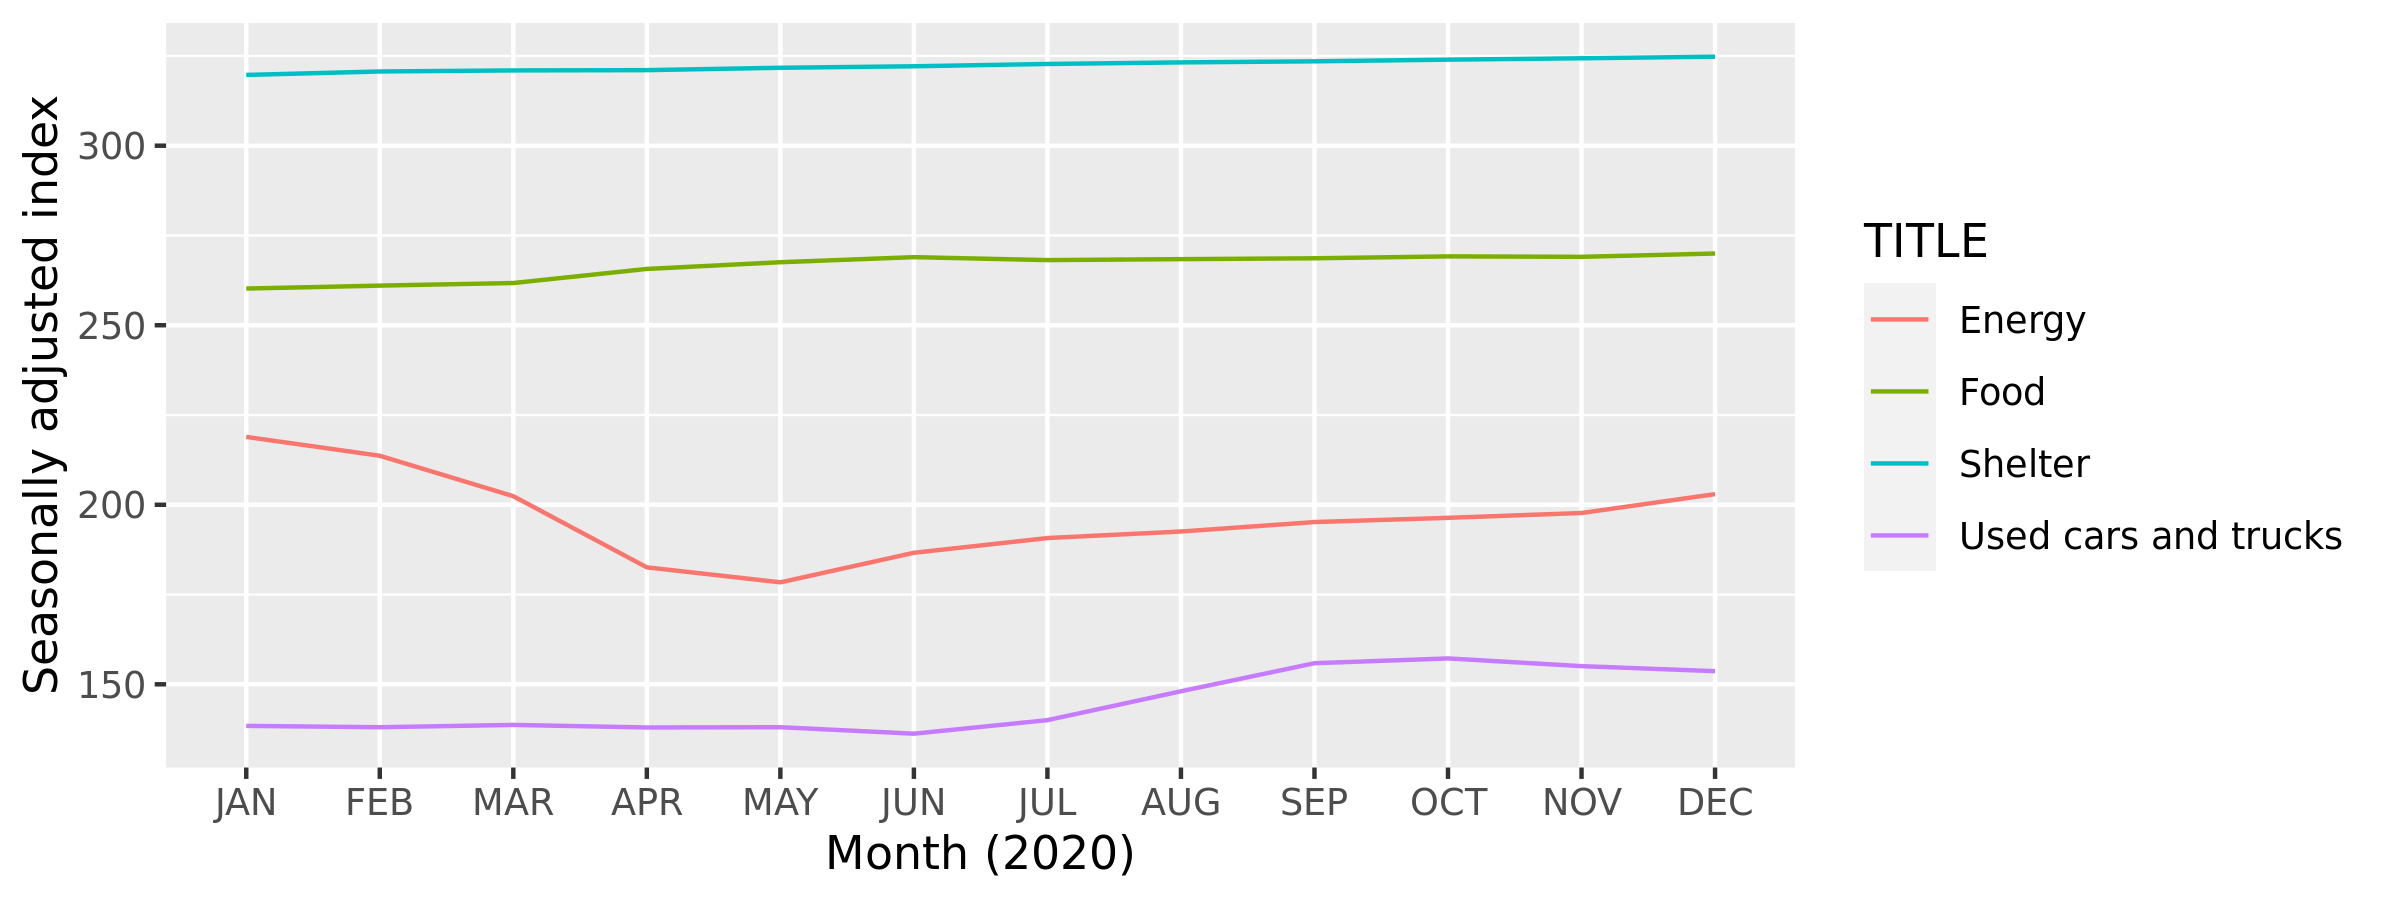

In [57]:
p=ggplot(df_final, aes(x = Month, y = mean_index, group = TITLE, color = TITLE)) +
  geom_line() +
  scale_x_discrete(limits = months) +
  labs(x = "Month (2020)", y = "Seasonally adjusted index")
p

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.